# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import mpl_toolkits.mplot3d
import ipywidgets


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
#import inauguralproject
from HouseholdSpecializationModel import  HouseholdSpecializationModelClass
# We import our class as model
model = HouseholdSpecializationModelClass()


# Question 1

Illustrate how $HF/HM$ changes when varying α ∈{0.25,0.50,0.75} and σ = {0.5,1.0,1.5}.

To solve this question, we run the module 'solve_discrete' for each set of alpha and sigma values that we have, this will give us 9 values, which we then place in a matrix. 

c:\Users\Tobias\OneDrive\Dokumenter\projects-2023-jt\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


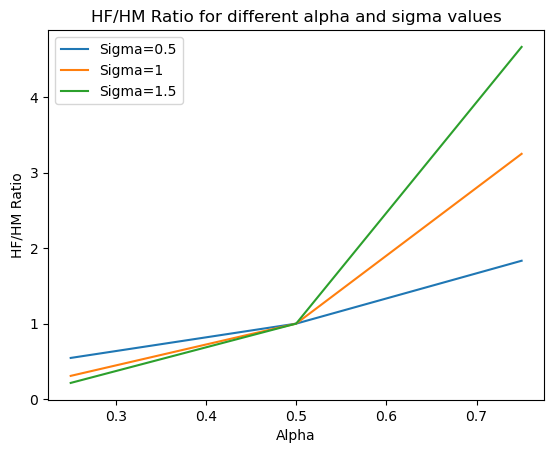

In [2]:
# Defining alphas and sigmas
alphas = [0.25, 0.50, 0.75]
sigmas = [0.5, 1, 1.5]

# Creating an empty array for HF and HM ratios
HF_HM_matrix = np.empty((len(alphas), len(sigmas)))

for i, alpha in enumerate(alphas):
    for j, sigma in enumerate(sigmas):
        model.par.alpha = alpha
        model.par.sigma = sigma
        opt = model.solve_discrete()  # Solve model discretely
        HF_HM_matrix[i, j] = opt.HF / opt.HM  # Assign ratio to array

# Plotting the ratios for the different alphas with sigma as a fixed variable
for j, sigma in enumerate(sigmas):
    plt.plot(alphas, HF_HM_matrix[:, j], label='Sigma=' + str(sigma))

plt.xlabel('Alpha')
plt.ylabel('HF/HM Ratio')
plt.title('HF/HM Ratio for different alpha and sigma values')
plt.legend()
plt.show()




We are now making a table that shows the evolution of the HF/HM relationship for the different values of alpha and sigma.

|   | $\sigma=0.5$ | $\sigma=1$   | $\sigma=1.5$ |
|---|--------------|--------------|---------------|
| $\alpha=0.25$ | 0.545         | 0.308       | 0.214         |
| $\alpha=0.50$ | 1.000         | 1.000       | 1.000         |
| $\alpha=0.75$ | 1.833         | 3.250       | 4.667         |

From the table we can see that when alpha is equal to 0.5, the HF/HM ratio will always be 1, no mattter the value og sigma. When alpha is 0.25, the ratio is decreasing when sigma increases, and when alpha is 0.75 the ratio will increase with an increasing sigmavalue. This means that when alpha <0.5 there will be an inverse relationship between size of sigma and the size of the HF/HM ratio. When alpha >0.5 there will be a direct relationship. 

# Question 2

plotting $Wf/Wm$ ratio

In question 2 we are looking at how the wageratio (wF/wM) affects the workratio (HF/HM). To do this we are resetting our alpha and sigma values, so that we have the basline parameters of alpha = 0.5 and sigma =1.0. From here we call on the 'solve_wF_vec' module from the .py-file, to calculate and plot the two log-values against each other. 
It should be noted that the log (wF/wM) is equal to log(wF); this is due to reason that it is only wF that changes, and therefore it is assumed that wM is still equal to the baseline value of 1. 

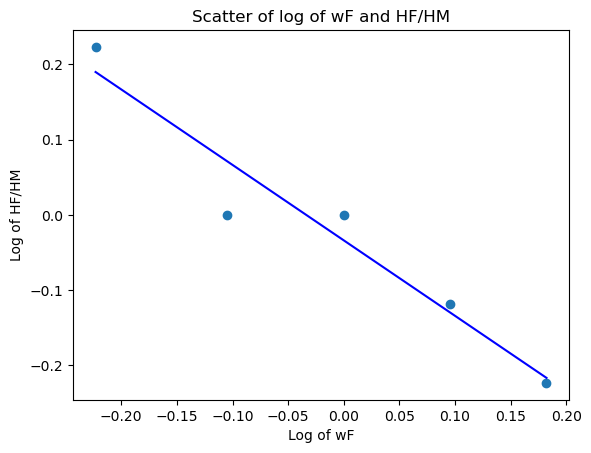

In [3]:
model.par.alpha = 0.5
model.par.sigma = 1
model.solve_wF_vec(discrete=True, do_plot=True)

From this result we can see that when the wageratio increases, the workratio will decrease.

# Question 3

For question 3 we are asked to plot the same as in question two, but with the change that the choice set, for hours working for men and women in either the house or in the market, is now continuos; this means that when doing plot, we will get more accurate results for the maximization-problem. 
To solve the question, we use the 'solve' module from the .py file, and solve the continuous maximization problem with the 'Nelder-Mead' method.

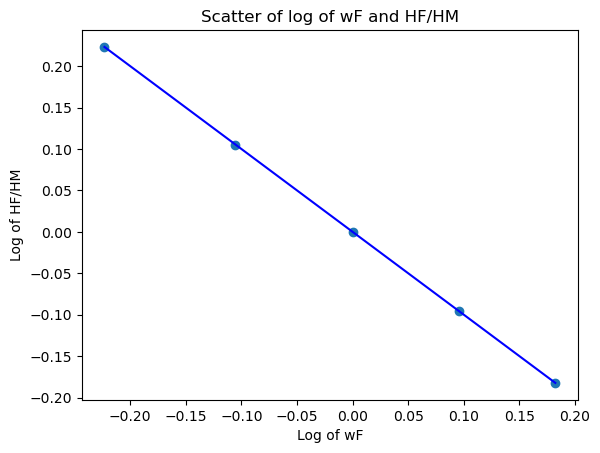

In [4]:
model.solve_wF_vec(do_plot=True)


The result is very similar to that of question 2, but the regression line here perfectly follows the plotted values. From this regression, have also calculated the two beta-values, beta0 and beta1, whis shows the intercept- and slope-values. 

# Question 4

Choose $\alpha$ and $\sigma$ such that it minimizes the expression. Illustrate how the model fit the data and discuss the economic interpretation of the results.

For question 4, we have made a new method on our class, called estimate. What this function does it that it calculates the beta0 and beta1 values given an alpha and a sigma. We have then added an optimization model for the R-squared formula and then we are using scipy to minimize our R-squared value.

c:\Users\Tobias\OneDrive\Dokumenter\projects-2023-jt\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Tobias\OneDrive\Dokumenter\projects-2023-jt\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


alpha = 0.9820
sigma = 0.1000
beta0 = 0.4000
beta1 = -0.1000
R-squared = 0.0000


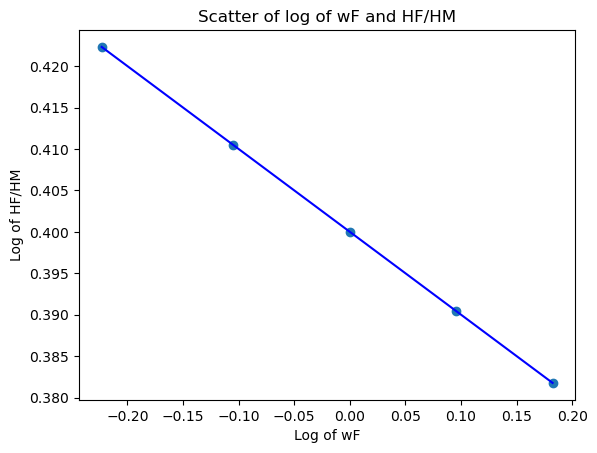

In [5]:
model.estimate(do_print=True)
model.solve_wF_vec(do_plot=True)
model.run_regression(print_beta=False)

After running our method, we can now see that the values that produces the best result compared to the targets for our beta values are an alpha value of 0.9820 and a sigma value of 1. It should however be noted that those exact values will not produce the correct results as in the code there are a lot more digits in the values, which has quite a large impact on the estimated beta values.

The economic interpretation of the results is quite logical, since it shows that the higher the wages are for women compared to men, the less time they want to spend working at home. 

# Question 5

We discover in Q4 that mens domestic output is significantly lower than womens. We therefore thought and interesting extension of the model would be to try and increase the disutility that women get for working, to see if this can bring our alpha closer to zero and hereby fit the data better.

For our extension of our model, we have split the disutility into the parameters $\epsilon_m$ and $\epsilon_f$. These show the disutility from working in the market for men and women respectively. We have added these to our model and then we have locked our alpha value at 0.5 as the data suggested.

Then we create a new optimizer where we try to find values for our $\epsilon_f$ and $\sigma$ that can make our model fit the data.

alpha = 0.5000
sigma = 1.9057
epsilon_f = 2.1793
epsilon_m = 1.0000
beta0 = 0.4000
beta1 = -0.1000
R-squared = 0.0000


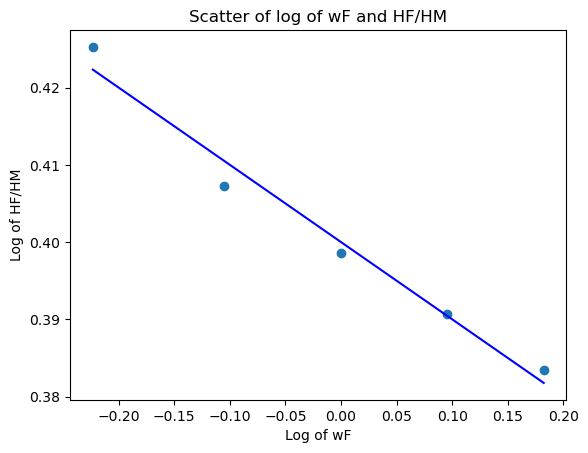

In [6]:
from HouseholdSpecializationModel import HouseholdSpecializationModelClassExt
modelext = HouseholdSpecializationModelClassExt()
modelext.estimate(do_print=True)
modelext.solve_wF_vec(do_plot=True)

As we can see from our estimation, if we happy the parameter $\epsilon_f = 2.1793$ to our model, while keeping $\epsilon_m$ at 1. We are able to fit our data, while keeping alpha at 0.5

The economic interpretation of this result is that we need to increase the amount of disutility that women get from working at home and in the market.

In conclusion we find that the $\epsilon_f = 2.1793$, meaning that for the work shares to be evenly divided, we have to make women dislike working more than men.

ADD CONCISE CONLUSION.